# Analyse license choices for bioRxiv preprints

In [1]:
import json

import pandas
import altair

In [2]:
# Ordered according to https://creativecommons.org/licenses/
licenses = ['CC BY', 'CC BY-ND', 'CC BY-NC', 'CC BY-NC-ND', 'None']

## Read data

In [3]:
df = pandas.read_table('data/biorxiv-prepubmed.tsv', parse_dates=['date'])
df.license = df.license.fillna('None')
df.license = pandas.Categorical(df.license, licenses)
df.head(2)

,doi,date,subjects,license,version
0,10.1101/049031,2016-04-16,Microbiology,CC BY-NC,4.0
1,10.1101/049049,2016-04-16,Genomics,CC BY-NC-ND,4.0


## Frequency by license type

In [4]:
df.license.value_counts(normalize=True)

CC BY-NC-ND    0.367544
None           0.297222
CC BY          0.178801
CC BY-NC       0.084649
CC BY-ND       0.071784
Name: license, dtype: float64

## License distribution over time

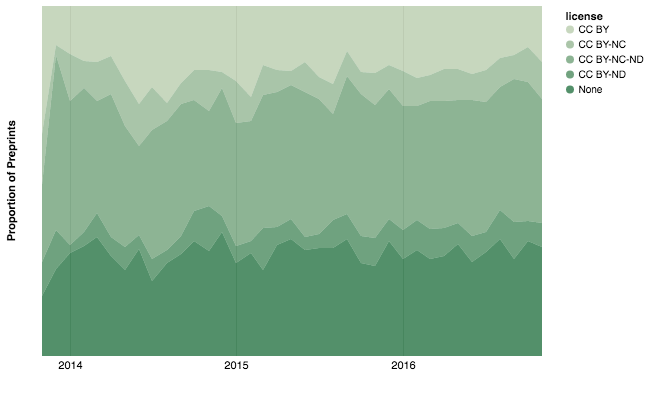

In [5]:
x_axis = altair.Axis(
    axisWidth=0.0,
    format='%Y',
    labelAngle=0.0,
    tickSize=0.0,
)

y_axis = altair.Axis(grid=False, ticks=0, labels=False, axisWidth=0)

x_scale = altair.Scale(nice='month')

chart = altair.Chart(data=df)
chart = chart.mark_area(stacked='normalize')
chart.encode(
    x = altair.X('date:T', timeUnit='yearmonth', axis=x_axis, title=' ', scale=x_scale),
    y = altair.Y('count(*):Q', axis=y_axis, title='Proportion of Preprints'),
    color = altair.Color(field='license', type='ordinal'),
)

In [6]:
# Export chart data
data = chart.to_dict()['data']['values']
with open('figure/license-vs-time/vega-lite-data.json', 'w') as write_file:
    json.dump(data, write_file, ensure_ascii=False, indent=2, sort_keys=True)

# Export chart
with open('figure/license-vs-time/vega-lite-config.json', 'w') as write_file:
    config = chart.to_json(indent=2, data=False, ensure_ascii=True)
    write_file.write(config)